In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [2]:
# Llegeixo el dataframe de Lloguers
LloguersBCN = pd.read_csv('/Users/angelssastrenadal/Downloads/ProvaHack/2017_lloguer_preu_trim.csv')
pd.set_option('display.max_rows',None)
LloguersBCN = LloguersBCN.sort_values(by='Preu',ascending=True)
LloguersBCN.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
420,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),4.45
491,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),6.84
564,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.17
345,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.26
492,2017,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.38
421,2017,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà per superfície (Euros/m2 mes),7.44
419,2017,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.54
565,2017,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.55
346,2017,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.93
340,2017,1,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),8.05


In [3]:
LloguersBCN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 420 to 568
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 41.1+ KB


- Veig que es un resum del 2017 per districte i barri del preu de lloguer mensual, amb 584 registres i 8 columnes
- Veig que la variable 'Preu' està com a float64 i s'hauria de canviar a un nombre Int
- Veig que hi han preus que son Euros/mes, altres Euros metro quadrat/mes,i altres amb NaN on hi falten dades, per tant s'haurà de homogeneitzar la bdd

In [4]:
#Miro si hi han dups
duplicats = LloguersBCN.duplicated() #Miro si hi han files/registres duplicats
num_duplicates = duplicats.sum()
print("Hi han", num_duplicates, "duplicats.")

Hi han 0 duplicats.


In [5]:
#Miro els tipus de valors que son objectes
valors_unicsLloguer = LloguersBCN['Lloguer_mitja'].unique()
valors_unicsCodi = LloguersBCN['Codi_Districte'].unique()

valors_unicsCodi

array([ 8,  9,  7, 10,  3,  5,  6,  2,  4,  1])

In [6]:
valors_unicsLloguer

array(['Lloguer mitjà per superfície (Euros/m2 mes)',
       'Lloguer mitjà mensual (Euros/mes)'], dtype=object)

In [7]:
LloguersBCN.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              38
dtype: int64

In [8]:
 # Filtrem i creem un nou dataframe per veure només el lloguer mitjà mensual (Euros/mes)
filtre = LloguersBCN['Lloguer_mitja'].str.contains('Lloguer mitjà mensual')
lloguerEurosmes = LloguersBCN.loc[filtre]
lloguerEurosmes.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
128,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),302.52
119,2017,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),407.22
53,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),418.07
200,2017,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),423.09
273,2017,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),425.51
129,2017,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà mensual (Euros/mes),434.91
127,2017,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),436.17
272,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),448.23
54,2017,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),459.19
199,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),463.17


In [9]:
lloguerEurosmes.isnull().sum() #Miro si te NaNs

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              19
dtype: int64

In [10]:
# Substitueixo els valors NaN de la columna "Preu" amb la mitjana per Districte
lloguerEurosmes_copy = lloguerEurosmes.copy()

lloguerEurosmes_copy['Preu'] = lloguerEurosmes.groupby('Nom_Districte')['Preu'].transform(lambda x: x.fillna(x.mean()))
 
#Ara torno a calcular la mitjana per Barri
mitjanaxdistricte_nonulls = lloguerEurosmes_copy.groupby('Nom_Barri')['Preu'].mean() #Agrupo per districte i faig mitja de nou
mitjanaxdistricte_nonulls = mitjanaxdistricte_nonulls.sort_values(ascending=False) #Ordeno
mitjanaxdistricte_nonulls = mitjanaxdistricte_nonulls.reset_index() #Faig un nou dataframe
mitjanaxdistricte_nonulls


,Nom_Barri,Preu
0,Pedralbes,1785.88500
1,les Tres Torres,1627.20250
2,Sarrià,1353.53500
3,Sant Gervasi - Galvany,1312.36500
4,la Vila Olímpica del Poblenou,1248.27000
5,Sant Gervasi - la Bonanova,1235.24250
6,"Vallvidrera, el Tibidabo i les Planes",1231.01000
7,la Dreta de l'Eixample,1193.36500
8,Diagonal Mar i el Front Marítim del Poblenou,1109.97750
9,l'Antiga Esquerra de l'Eixample,1056.31750


Veiem que el barri mes car es Pedralbes que es mes de 4 vegades el de Ciutat Meridiana.

In [11]:
  # Filtrem i creem un nou dataframe per veure només el "Lloguer mitjà per superfície (Euros/m2 mes)""	
filtre2 = LloguersBCN['Lloguer_mitja'].str.contains('Lloguer mitjà per superfície')
lloguerEurossuperficie = LloguersBCN.loc[filtre2]
lloguerEurossuperficie.sort_values(by='Preu',ascending=False) #ordeno per Preu
lloguerEurossuperficie.tail(9)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
479,2017,3,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
484,2017,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
493,2017,3,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
495,2017,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),NaN
522,2017,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
552,2017,4,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
557,2017,4,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
566,2017,4,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
568,2017,4,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [12]:
lloguerEurossuperficie.isnull().sum()  #Miro si te NaNs

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              19
dtype: int64

In [13]:
# Substitueixo els valors NaN de la columna "Preu" amb la mitjana per Districte
lloguerEurossuperficie_copia = lloguerEurossuperficie.copy() #faig una copia de la bdd

lloguerEurossuperficie_copia['Preu'] = lloguerEurossuperficie.groupby('Nom_Districte')['Preu'].transform(lambda x: x.fillna(x.mean()))
 
#Ara torno a calcular la mitjana per districte
mitjanaxdistricteisup = lloguerEurossuperficie_copia.groupby('Nom_Barri')['Preu'].mean() #Agrupo per districte i faig mitja de nou
mitjanaxdistricteisup = mitjanaxdistricteisup.sort_values(ascending=False) #Ordeno
mitjanaxdistricteisup = mitjanaxdistricteisup.reset_index() #Faig un nou dataframe
mitjanaxdistricteisup

,Nom_Barri,Preu
0,la Barceloneta,19.845000
1,Sarrià,17.447500
2,la Vila Olímpica del Poblenou,17.097500
3,les Tres Torres,16.832500
4,"Vallvidrera, el Tibidabo i les Planes",16.660000
5,Pedralbes,16.142500
6,Diagonal Mar i el Front Marítim del Poblenou,16.057500
7,"Sant Pere, Santa Caterina i la Ribera",15.705000
8,Sant Gervasi - la Bonanova,15.317500
9,la Vila de Gràcia,15.002500


Veiem aqui que la diferencia entre la mitja m2 del barri mes car, al mes econòmic no es tant extrema com els preus mensuals mitjos.



In [14]:
#Llegeixo el dataframe de sorolls
SorollsBCN = pd.read_csv('/Users/angelssastrenadal/Downloads/Provahack/2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #Miro totes les files i columnes
SorollsBCN = SorollsBCN.sort_values(by='Codi_Barri',ascending=True) #Ordeno per preu de mes petit a mes gran
SorollsBCN.head(20)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
5111,1,Ciutat Vella,1,el Raval,TRANSIT_DEN,40-45 dB,34.91%
5110,1,Ciutat Vella,1,el Raval,TRANSIT_DEN,<40 dB,2.74%
4389,1,Ciutat Vella,1,el Raval,TRANSIT_N,>=80 dB,0.00%
4388,1,Ciutat Vella,1,el Raval,TRANSIT_N,75-80 dB,0.00%
4387,1,Ciutat Vella,1,el Raval,TRANSIT_N,70-75 dB,0.00%
4386,1,Ciutat Vella,1,el Raval,TRANSIT_N,65-70 dB,0.33%
4385,1,Ciutat Vella,1,el Raval,TRANSIT_N,60-65 dB,6.15%
4384,1,Ciutat Vella,1,el Raval,TRANSIT_N,55-60 dB,9.28%
4383,1,Ciutat Vella,1,el Raval,TRANSIT_N,50-55 dB,17.08%


In [15]:
sorollduplicats = SorollsBCN.duplicated() #Miro si hi han files/registres duplicats
num_duplicates = sorollduplicats.sum()
print("Hi han", num_duplicates, "duplicats.")

Hi han 0 duplicats.


In [16]:
SorollsBCN.isnull().sum()  #Miro si te NaNs


Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Concepte          0
Rang_soroll       0
Valor             0
dtype: int64

In [17]:
SorollsBCN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18980 entries, 0 to 18979
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  18980 non-null  int64 
 1   Nom_Districte   18980 non-null  object
 2   Codi_Barri      18980 non-null  int64 
 3   Nom_Barri       18980 non-null  object
 4   Concepte        18980 non-null  object
 5   Rang_soroll     18980 non-null  object
 6   Valor           18980 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


- Veig que la variable Valor es un object i la canvio a numeric per poder fer calculs

In [18]:
SorollsBCN['Valor'] = pd.to_numeric(SorollsBCN['Valor'].str.rstrip('%'), errors='coerce')

# Ara la columna "Valor" serà de tipus numèric
print(SorollsBCN.dtypes)

Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Concepte           object
Rang_soroll        object
Valor             float64
dtype: object


- Vull tambe fer calculs amb el Rang_Soroll per barri, pero com es un objecte li aplico el valor numèric mig a cada medició

In [19]:
valors_unics_Soroll = SorollsBCN['Rang_soroll'].unique()
valors_unics_Soroll



array(['<40 dB', '40-45 dB', '>=80 dB', '75-80 dB', '70-75 dB',
       '65-70 dB', '60-65 dB', '55-60 dB', '50-55 dB', '45-50 dB'],
      dtype=object)

In [20]:
def valor_numeric_rang(rang):
    rang = rang.strip()  # Elimina possibles espais addicionals
    if rang == "<40 dB":
        return 35  # Valor mig del rang <40 dB
    elif rang == "40-45 dB":
        return 42.5  # Valor mig del rang 40-45 dB
    elif rang == "45-50 dB":
        return 47.5  # Valor mig del rang 45-50 dB
    elif rang == "50-55 dB":
        return 52.5  
    elif rang == "55-60 dB":
        return 57.5
    elif rang == "60-65 dB":
        return 62.5 
    elif rang == "65-70 dB":
        return 67.5
    elif rang == "70-75 dB":
        return 72.5 
    elif rang == "75-80 dB":
        return 77.5
    elif rang == ">=80 dB":
        return 85 
        

# Aplique la funció per convertir els valors de "Rang_soroll" en valors numèrics i crea una nova columna
SorollsBCN['Valor_numeric_Rang_soroll'] = SorollsBCN['Rang_soroll'].apply(valor_numeric_rang)
SorollsBCN.head(20)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Valor_numeric_Rang_soroll
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73,35.0
5111,1,Ciutat Vella,1,el Raval,TRANSIT_DEN,40-45 dB,34.91,42.5
5110,1,Ciutat Vella,1,el Raval,TRANSIT_DEN,<40 dB,2.74,35.0
4389,1,Ciutat Vella,1,el Raval,TRANSIT_N,>=80 dB,0.00,85.0
4388,1,Ciutat Vella,1,el Raval,TRANSIT_N,75-80 dB,0.00,77.5
4387,1,Ciutat Vella,1,el Raval,TRANSIT_N,70-75 dB,0.00,72.5
4386,1,Ciutat Vella,1,el Raval,TRANSIT_N,65-70 dB,0.33,67.5
4385,1,Ciutat Vella,1,el Raval,TRANSIT_N,60-65 dB,6.15,62.5
4384,1,Ciutat Vella,1,el Raval,TRANSIT_N,55-60 dB,9.28,57.5
4383,1,Ciutat Vella,1,el Raval,TRANSIT_N,50-55 dB,17.08,52.5


- Miro si hi han valors nuls
- Comprovo que s'han assignat els valors numerics per Rang_soroll
- Comprovo els valors per codi de Barri al Dataframe Sorolls i Lloguers son iguals

In [21]:
valors_nuls = SorollsBCN.isnull().sum()
valors_unics = SorollsBCN['Valor_numeric_Rang_soroll'].unique()
valors_unicsbarri = SorollsBCN['Codi_Barri'].unique()
valorsbarri_lloguerEurossuperficie = lloguerEurossuperficie['Codi_Barri'].unique()
print("Quantitat de valors nuls:", valors_nuls)
print("Valors únics a la columna:", valors_unics)
print("Valors únics a la columnaBarri:", valors_unicsbarri)
print("valorsbarri_lloguerEurossuperficie:", valorsbarri_lloguerEurossuperficie)
# Comprova si les dues llistes són iguals
if sorted(valors_unicsbarri) == sorted(valorsbarri_lloguerEurossuperficie):
    print("Les llistes són iguals.")
else:
    print("Les llistes no són iguals.")

Quantitat de valors nuls: Codi_Districte               0
Nom_Districte                0
Codi_Barri                   0
Nom_Barri                    0
Concepte                     0
Rang_soroll                  0
Valor                        0
Valor_numeric_Rang_soroll    0
dtype: int64
Valors únics a la columna: [35.  42.5 85.  77.5 72.5 67.5 62.5 57.5 52.5 47.5]
Valors únics a la columnaBarri: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
valorsbarri_lloguerEurossuperficie: [56 54 55 57 49 59 48 39 50 70 61 73 13 53 22 45 46 63 51 37 72 38 52 40
 16 44 62 43 41 30 47 29 35 34 60 33 65 36 15 10 14  5 71 64  7 18 17 32
  9 11  6 66 20  8 68  1 19  2 28 27 26 25 31  4 21 69 67 24 23  3 12 42
 58]
Les llistes són iguals.


In [22]:
SorollsBCN.describe()


,Codi_Districte,Codi_Barri,Valor,Valor_numeric_Rang_soroll
count,18980.000000,18980.000000,18980.000000,18980.00000
mean,6.246575,37.000000,10.000000,60.00000
std,2.788409,21.071863,23.235287,15.16615
min,1.000000,1.000000,0.000000,35.00000
25%,4.000000,19.000000,0.000000,47.50000
50%,7.000000,37.000000,0.000000,60.00000
75%,8.000000,55.000000,8.590000,72.50000
max,10.000000,73.000000,100.000000,85.00000


- Filtro les files on el valor de la columna "Valor" que vol dir que mes del 0% ha detectat el soroll


In [23]:
registres_major_0 = SorollsBCN[SorollsBCN['Valor'] > 0]
registres_major_0.head(20)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Valor_numeric_Rang_soroll
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73,35.0
5111,1,Ciutat Vella,1,el Raval,TRANSIT_DEN,40-45 dB,34.91,42.5
5110,1,Ciutat Vella,1,el Raval,TRANSIT_DEN,<40 dB,2.74,35.0
4386,1,Ciutat Vella,1,el Raval,TRANSIT_N,65-70 dB,0.33,67.5
4385,1,Ciutat Vella,1,el Raval,TRANSIT_N,60-65 dB,6.15,62.5
4384,1,Ciutat Vella,1,el Raval,TRANSIT_N,55-60 dB,9.28,57.5
4383,1,Ciutat Vella,1,el Raval,TRANSIT_N,50-55 dB,17.08,52.5
4382,1,Ciutat Vella,1,el Raval,TRANSIT_N,45-50 dB,14.40,47.5
4381,1,Ciutat Vella,1,el Raval,TRANSIT_N,40-45 dB,6.58,42.5
4380,1,Ciutat Vella,1,el Raval,TRANSIT_N,<40 dB,46.18,35.0


- Filtro per tenir el total de Soroll, sense distingir entre transit, oci, etc

In [24]:

registresTOTAL_DEN = registres_major_0[registres_major_0['Concepte'] == "TOTAL_DEN"]
registresTOTAL_DEN.head(20)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Valor_numeric_Rang_soroll
2190,1,Ciutat Vella,1,el Raval,TOTAL_DEN,<40 dB,0.27,35.0
2191,1,Ciutat Vella,1,el Raval,TOTAL_DEN,40-45 dB,28.36,42.5
2192,1,Ciutat Vella,1,el Raval,TOTAL_DEN,45-50 dB,11.97,47.5
2198,1,Ciutat Vella,1,el Raval,TOTAL_DEN,75-80 dB,0.10,77.5
2197,1,Ciutat Vella,1,el Raval,TOTAL_DEN,70-75 dB,5.85,72.5
2196,1,Ciutat Vella,1,el Raval,TOTAL_DEN,65-70 dB,14.35,67.5
2195,1,Ciutat Vella,1,el Raval,TOTAL_DEN,60-65 dB,15.75,62.5
2194,1,Ciutat Vella,1,el Raval,TOTAL_DEN,55-60 dB,15.40,57.5
2193,1,Ciutat Vella,1,el Raval,TOTAL_DEN,50-55 dB,7.95,52.5
2208,1,Ciutat Vella,2,el Barri Gòtic,TOTAL_DEN,75-80 dB,0.44,77.5


In [25]:
registresTOTAL_DEN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 2190 to 2911
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Codi_Districte             620 non-null    int64  
 1   Nom_Districte              620 non-null    object 
 2   Codi_Barri                 620 non-null    int64  
 3   Nom_Barri                  620 non-null    object 
 4   Concepte                   620 non-null    object 
 5   Rang_soroll                620 non-null    object 
 6   Valor                      620 non-null    float64
 7   Valor_numeric_Rang_soroll  620 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 43.6+ KB


- Trobo l'índex del màxim 'Valor' per a cada 'Nom_Barri', Aixi trobem el % mes gran indica de soroll per barri 


In [26]:
idx = registresTOTAL_DEN.groupby('Nom_Barri')['Valor'].idxmax()

# Utilitzar els índexs obtinguts per seleccionar els registres corresponents
max_vals_per_barri = registresTOTAL_DEN.loc[idx]
max_vals_per_barri 


,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Valor_numeric_Rang_soroll
2764,9,Sant Andreu,58,Baró de Viver,TOTAL_DEN,55-60 dB,28.79,57.5
2525,7,Horta-Guinardó,34,Can Baró,TOTAL_DEN,60-65 dB,21.87,62.5
2653,8,Nou Barris,47,Can Peguera,TOTAL_DEN,50-55 dB,43.53,52.5
2674,8,Nou Barris,49,Canyelles,TOTAL_DEN,55-60 dB,34.15,57.5
2735,8,Nou Barris,55,Ciutat Meridiana,TOTAL_DEN,60-65 dB,20.56,62.5
2875,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,TOTAL_DEN,60-65 dB,34.32,62.5
2612,7,Horta-Guinardó,43,Horta,TOTAL_DEN,45-50 dB,18.91,47.5
2332,3,Sants-Montjuïc,15,Hostafrancs,TOTAL_DEN,45-50 dB,25.74,47.5
2584,7,Horta-Guinardó,40,Montbau,TOTAL_DEN,55-60 dB,23.82,57.5
2812,9,Sant Andreu,63,Navas,TOTAL_DEN,45-50 dB,26.90,47.5


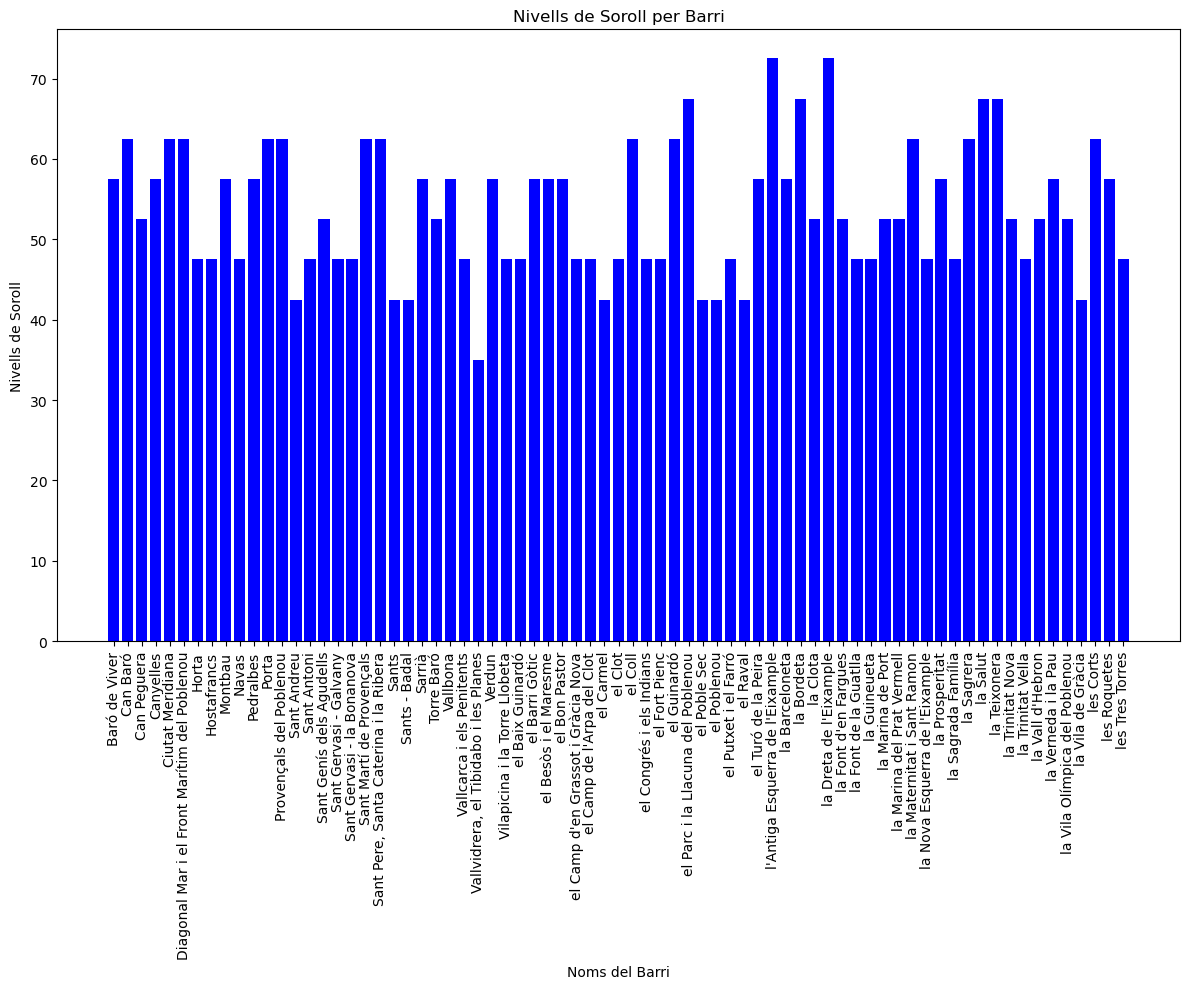

In [27]:
# Creo el gràfic de barres per veure si els resultats tenen lògica amb la tipologia de barri
plt.figure(figsize=(12, 10))  # Defineix la mida de la figura
plt.bar(max_vals_per_barri['Nom_Barri'], max_vals_per_barri['Valor_numeric_Rang_soroll'], color='blue')  # Crea un gràfic de barres per Nom de barri amb el 'Valor_numeric_Rang_soroll'

# Etiquetes i títol del gràfic
plt.xlabel('Noms del Barri')
plt.ylabel('Nivells de Soroll')
plt.title('Nivells de Soroll per Barri')

# Rotació de les etiquetes de l'eix X per millor llegibilitat
plt.xticks(rotation=90)

# Mostra el gràfic
plt.tight_layout()  # Ajusta el disseny per evitar tallar les etiquetes
plt.show()

Afegeixo el soroll per Barri en els 2 dataframes de lloguer. Posteriorment, intentarem veure si te un efecte en el preu

In [28]:
barri_valor_mapping = max_vals_per_barri.set_index('Codi_Barri')['Valor_numeric_Rang_soroll'].to_dict()

# Afegiu la nova columna 'Valor numeric rang Soroll' a l'altre dataframe
lloguerEurossuperficie_copia['Soroll_db_barri '] = lloguerEurossuperficie_copia['Codi_Barri'].map(barri_valor_mapping)
lloguerEurossuperficie_copia.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Soroll_db_barri
420,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),4.45,57.5
491,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),6.84,52.5
564,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.17,52.5
345,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.26,52.5
492,2017,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.38,62.5
421,2017,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà per superfície (Euros/m2 mes),7.44,47.5
419,2017,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.54,62.5
565,2017,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.55,62.5
346,2017,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.93,62.5
340,2017,1,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),8.05,57.5


In [29]:
lloguerEurosmes_copy['Soroll_db_barri'] = lloguerEurosmes_copy['Codi_Barri'].map(barri_valor_mapping)
lloguerEurosmes_copy.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Soroll_db_barri
128,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),302.52,57.5
119,2017,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),407.22,52.5
53,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),418.07,52.5
200,2017,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),423.09,62.5
273,2017,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),425.51,62.5
129,2017,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà mensual (Euros/mes),434.91,47.5
127,2017,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),436.17,62.5
272,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),448.23,52.5
54,2017,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),459.19,62.5
199,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),463.17,52.5


In [30]:
#Llegeixo el dataframe de d'accidents
AccidentsBCN = pd.read_csv('/Users/angelssastrenadal/Downloads/Provahack/2017_accidents_causa_conductor_gu_bcn_.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #Miro totes les files i columnes
AccidentsBCN = AccidentsBCN.sort_values(by='Codi_barri',ascending=True) #Ordeno per preu de mes petit a mes gran
AccidentsBCN.tail(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
4192,2017S003793,10,Sant Martí,73,la Verneda i la Pau,57802,Camp Arriassa,0084 0084,Divendres,2017,4,Abril,28,16,Desobeir semàfor,Tarda,433513.80,4586375.30,2.203206,41.424343
1520,2017S006089,10,Sant Martí,73,la Verneda i la Pau,153205,Guipúscoa,0103 0105,Dijous,2017,7,Juliol,13,9,No respectar distàncies,Matí,433366.06,4585856.75,2.201495,41.419661
1514,2017S002018,10,Sant Martí,73,la Verneda i la Pau,208205,Menorca,0108X0108X,Dilluns,2017,3,Març,13,7,Manca d'atenció a la conducció,Matí,435119.93,4585013.26,2.222572,41.412207
1512,2017S003256,10,Sant Martí,73,la Verneda i la Pau,208205,Menorca,0051 0051,Diumenge,2017,4,Abril,9,1,Desobeir altres senyals,Nit,433331.57,4586193.84,2.201045,41.422694
1509,2017S010050,10,Sant Martí,73,la Verneda i la Pau,318906,Santander,0063A0063A,Divendres,2017,12,Desembre,1,18,Manca d'atenció a la conducció,Tarda,433490.77,4586875.02,2.202875,41.428842
1505,2017S006352,10,Sant Martí,73,la Verneda i la Pau,266405,Prim,0160 0160,Dijous,2017,7,Juliol,20,19,Desobeir semàfor,Tarda,433942.83,4585841.27,2.208398,41.419569
1504,2017S004748,10,Sant Martí,73,la Verneda i la Pau,169409,Corts Catalanes,1163 1163,Dimarts,2017,5,Maig,30,8,Manca d'atenció a la conducció,Matí,434078.33,4585946.20,2.210008,41.420525
1503,2017S005517,10,Sant Martí,73,la Verneda i la Pau,266405,Prim,0210B0210B,Divendres,2017,6,Juny,23,22,Altres,Nit,433592.69,4586244.02,2.204164,41.423167
9793,2017S000753,10,Sant Martí,73,la Verneda i la Pau,150852,Vivendes la Pau,0050 0050,Dissabte,2017,1,Gener,28,14,Altres,Tarda,433413.85,4586989.52,2.201942,41.429867
1499,2017S001926,10,Sant Martí,73,la Verneda i la Pau,700947,Clementina Arderiu,0003X0003X,Dijous,2017,3,Març,9,11,Manca precaució efectuar marxa enrera,Matí,433765.77,4585977.49,2.206265,41.420781


Unificare els 3 datasets i mostraré una unica base de dades per barri ja que veig que coincideix en les 3 dataframes.
On mostraré el preu mitjà de lloguer per barri el nivell de soroll i nombre d'accidents.


In [31]:
AccidentsBCN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11091 entries, 0 to 8349
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            11091 non-null  object 
 1   Codi_districte              11091 non-null  int64  
 2   Nom_districte               11091 non-null  object 
 3   Codi_barri                  11091 non-null  int64  
 4   Nom_barri                   11091 non-null  object 
 5   Codi_carrer                 11091 non-null  int64  
 6   Nom_carrer                  11091 non-null  object 
 7   Num_postal                  11089 non-null  object 
 8   Descripcio_dia_setmana      11091 non-null  object 
 9   NK_Any                      11091 non-null  int64  
 10  Mes_any                     11091 non-null  int64  
 11  Nom_mes                     11091 non-null  object 
 12  Dia_mes                     11091 non-null  int64  
 13  Hora_dia                    11091 non

In [32]:
valors_nuls = AccidentsBCN.isnull().sum()

valors_unicsbarriAcc = AccidentsBCN['Codi_barri'].unique()
valorsbarri_lloguerEurossuperficie = lloguerEurossuperficie['Codi_Barri'].unique()
print("Quantitat de valors nuls:", valors_nuls)
print("Valors únics a la columnaBarri:", valors_unicsbarriAcc)
print("valorsbarri_lloguerEurossuperficie:", valorsbarri_lloguerEurossuperficie)
# Troba els elements que estan a valors_unicsbarri i no a valorsbarri_lloguerEurossuperficie
elements_no_coincidents = set(valors_unicsbarriAcc) - set(valorsbarri_lloguerEurossuperficie)

# Si elements_no_coincidents no està buit, mostra els elements que no coincideixen
if elements_no_coincidents:
    print("Els següents elements de valors_unicsbarri no coincideixen amb valorsbarri_lloguerEurossuperficie:")
    for element in elements_no_coincidents:
        print(element)
else:
    print("Totes les dades coincideixen.")

Quantitat de valors nuls: Numero_expedient              0
Codi_districte                0
Nom_districte                 0
Codi_barri                    0
Nom_barri                     0
Codi_carrer                   0
Nom_carrer                    0
Num_postal                    2
Descripcio_dia_setmana        0
NK_Any                        0
Mes_any                       0
Nom_mes                       0
Dia_mes                       0
Hora_dia                      0
Descripcio_torn               0
Descripcio_causa_conductor    0
Coordenada_UTM_X_ED50         0
Coordenada_UTM_Y_ED50         0
Longitud                      0
Latitud                       0
dtype: int64
Valors únics a la columnaBarri: [-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
valorsbarri_lloguerEurossuperficie: [56 54 55 57 49 59 48 39 5

In [33]:
duplicatsacc = AccidentsBCN.duplicated() #Miro si hi han files/registres duplicats
num_duplicates = duplicatsacc.sum()
print("Hi han", num_duplicates, "duplicats.")

Hi han 0 duplicats.


- Veig que hi ha el codi de barri -1 que no coincideix
- Veig que hi ha 2 nuls en el num postal.
- Filtraré el codi barri -1 e intentaré omplir els camps de codi Barri amb la llibreria **Geopy**

In [34]:
AccidentsBCN_filtrat = AccidentsBCN[AccidentsBCN['Codi_barri'] == -1]
AccidentsBCN_filtrat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 5487
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            104 non-null    object 
 1   Codi_districte              104 non-null    int64  
 2   Nom_districte               104 non-null    object 
 3   Codi_barri                  104 non-null    int64  
 4   Nom_barri                   104 non-null    object 
 5   Codi_carrer                 104 non-null    int64  
 6   Nom_carrer                  104 non-null    object 
 7   Num_postal                  102 non-null    object 
 8   Descripcio_dia_setmana      104 non-null    object 
 9   NK_Any                      104 non-null    int64  
 10  Mes_any                     104 non-null    int64  
 11  Nom_mes                     104 non-null    object 
 12  Dia_mes                     104 non-null    int64  
 13  Hora_dia                    104 non-nul

In [35]:
from geopy.geocoders import Nominatim

# Crea una instància del geocodificador
geolocator = Nominatim(user_agent="my_geocoder")

# Funció per obtenir el nom del barri i el codi de barri a partir de les coordenades
def get_barri_info(row):
    lat = row['Latitud']
    lon = row['Longitud']
    location = geolocator.reverse((lat, lon), exactly_one=True)
    address = location.raw['address']
    return pd.Series({
        'Nom_barri': address.get('neighbourhood', ''),
        'Nom_districte': address.get('suburb', '')
    })

# Aplica la funció a cada fila del DataFrame
AccidentsBCN_filtrat.loc[:, ['Nom_barri', 'Nom_districte']] = AccidentsBCN_filtrat.apply(get_barri_info, axis=1)
AccidentsBCN_filtrat.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Sant Martí,-1,,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1444,2017S003142,-1,Sants-Montjuïc,-1,la Marina de Port,-1,Desconegut,Desconegut,Dimecres,2017,4,Abril,5,12,Avançament defectuós/improcedent,Matí,427817.98,4579776.81,2.135836,41.364421
2806,2017S001239,-1,Sants-Montjuïc,-1,Zona Franca,-1,Desconegut,Desconegut,Dimarts,2017,2,Febrer,14,17,Canvi de carril sense precaució,Tarda,426842.33,4576816.19,2.124529,41.337668
1443,2017S003175,-1,Nou Barris,-1,la Torre Llobeta,-1,Desconegut,Desconegut,Dilluns,2017,4,Abril,3,9,No determinada,Matí,431357.41,4586967.11,2.177335,41.429492
1442,2017S007836,-1,Sants-Montjuïc,-1,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dijous,2017,9,Setembre,21,22,No respectar distàncies,Nit,429595.67,4578423.70,2.157246,41.352392
1441,2017S008312,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Diumenge,2017,10,Octubre,8,22,Altres,Nit,432376.59,4583239.02,2.189948,41.396001
1440,2017S003559,-1,les Corts,-1,,-1,Desconegut,Desconegut,Divendres,2017,4,Abril,21,12,Manca d'atenció a la conducció,Matí,428044.27,4582381.94,2.138232,41.387905
2807,2017S000467,-1,Sants-Montjuïc,-1,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dimarts,2017,1,Gener,17,15,Manca d'atenció a la conducció,Tarda,429120.79,4575740.05,2.151883,41.328179
1439,2017S008789,-1,Gràcia,-1,els Penitents,-1,Desconegut,Desconegut,Dimarts,2017,10,Octubre,24,10,Manca d'atenció a la conducció,Matí,428156.13,4585654.87,2.139181,41.417393
1438,2017S006927,-1,Eixample,-1,,-1,Desconegut,Desconegut,Divendres,2017,8,Agost,11,22,Desobeir semàfor,Nit,431937.47,4583875.38,2.184624,41.401695


In [36]:
AccidentsBCN_filtrat.info()
valors_nuls_filtrat = AccidentsBCN_filtrat.isnull().sum()
valors_unicsbarrifiltratAcc = AccidentsBCN_filtrat['Nom_barri'].unique()
print("Quantitat de valors nuls:", valors_nuls_filtrat)

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 5487
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            104 non-null    object 
 1   Codi_districte              104 non-null    int64  
 2   Nom_districte               104 non-null    object 
 3   Codi_barri                  104 non-null    int64  
 4   Nom_barri                   104 non-null    object 
 5   Codi_carrer                 104 non-null    int64  
 6   Nom_carrer                  104 non-null    object 
 7   Num_postal                  102 non-null    object 
 8   Descripcio_dia_setmana      104 non-null    object 
 9   NK_Any                      104 non-null    int64  
 10  Mes_any                     104 non-null    int64  
 11  Nom_mes                     104 non-null    object 
 12  Dia_mes                     104 non-null    int64  
 13  Hora_dia                    104 non-nul

Sembla que hi ha registres on no hem trobat ni nom de barri ni nom de districte, els mostrem per veure:

In [37]:
registres_buits = AccidentsBCN_filtrat[AccidentsBCN_filtrat['Nom_districte'] == '']
registres_buits

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
8258,2017S008046,-1,,-1,,-1,Desconegut,Desconegut,Divendres,2017,9,Setembre,29,14,Altres,Tarda,427727.58,4577874.30,2.134982,41.347278
5483,2017S004883,-1,,-1,,-1,Desconegut,Desconegut,Dijous,2017,6,Juny,8,4,Desobeir altres senyals,Nit,427728.32,4577932.12,2.134984,41.347799
1432,2017S010375,-1,,-1,,-1,Desconegut,Desconegut,Divendres,2017,12,Desembre,15,18,Desobeir altres senyals,Tarda,427728.32,4577932.12,2.134984,41.347799
1433,2017S004883,-1,,-1,,-1,Desconegut,Desconegut,Dijous,2017,6,Juny,8,4,Manca d'atenció a la conducció,Nit,427728.32,4577932.12,2.134984,41.347799


In [38]:
from geopy.geocoders import Nominatim

def troba_barri(latitud, longitud):
    # Crea un objecte geocoder utilitzant el servei Nominatim
    geolocalitzador = Nominatim(user_agent="app_de_geocodificacio")

    # Utilitza les coordenades de latitud i longitud per obtenir la ubicació
    ubicacio = geolocalitzador.reverse((latitud, longitud))

    # Extreu la informació del barri o ubicació
    barri = ubicacio.raw.get("address", {}).get("suburb")
    if not barri:
        barri = ubicacio.raw.get("address", {}).get("neighbourhood")

    return barri

# Prova la funció amb les teves coordenades de latitud i longitud
latitud = 41.347799
longitud = 2.134984
nom_barri = troba_barri(latitud, longitud)
print("Barri o ubicació:", nom_barri)



Barri o ubicació: None


Eliminem aquests 4 registres amb una latitud i longitud incorrecte perque semblen duplicats i fusionem de nou el database d'accidents i posarem el nombre d'accidents 

In [39]:
AccidentsBCN_filtrat = AccidentsBCN_filtrat.drop(registres_buits.index)
AccidentsBCN_filtrat.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Sant Martí,-1,,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1444,2017S003142,-1,Sants-Montjuïc,-1,la Marina de Port,-1,Desconegut,Desconegut,Dimecres,2017,4,Abril,5,12,Avançament defectuós/improcedent,Matí,427817.98,4579776.81,2.135836,41.364421
2806,2017S001239,-1,Sants-Montjuïc,-1,Zona Franca,-1,Desconegut,Desconegut,Dimarts,2017,2,Febrer,14,17,Canvi de carril sense precaució,Tarda,426842.33,4576816.19,2.124529,41.337668
1443,2017S003175,-1,Nou Barris,-1,la Torre Llobeta,-1,Desconegut,Desconegut,Dilluns,2017,4,Abril,3,9,No determinada,Matí,431357.41,4586967.11,2.177335,41.429492
1442,2017S007836,-1,Sants-Montjuïc,-1,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dijous,2017,9,Setembre,21,22,No respectar distàncies,Nit,429595.67,4578423.70,2.157246,41.352392
1441,2017S008312,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Diumenge,2017,10,Octubre,8,22,Altres,Nit,432376.59,4583239.02,2.189948,41.396001
1440,2017S003559,-1,les Corts,-1,,-1,Desconegut,Desconegut,Divendres,2017,4,Abril,21,12,Manca d'atenció a la conducció,Matí,428044.27,4582381.94,2.138232,41.387905
2807,2017S000467,-1,Sants-Montjuïc,-1,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dimarts,2017,1,Gener,17,15,Manca d'atenció a la conducció,Tarda,429120.79,4575740.05,2.151883,41.328179
1439,2017S008789,-1,Gràcia,-1,els Penitents,-1,Desconegut,Desconegut,Dimarts,2017,10,Octubre,24,10,Manca d'atenció a la conducció,Matí,428156.13,4585654.87,2.139181,41.417393
1438,2017S006927,-1,Eixample,-1,,-1,Desconegut,Desconegut,Divendres,2017,8,Agost,11,22,Desobeir semàfor,Nit,431937.47,4583875.38,2.184624,41.401695


Miro els registres que no s'han omplert:

In [40]:
registres_buits = AccidentsBCN_filtrat[AccidentsBCN_filtrat['Nom_barri'] == '']
registres_buits

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Sant Martí,-1,,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1441,2017S008312,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Diumenge,2017,10,Octubre,8,22,Altres,Nit,432376.59,4583239.02,2.189948,41.396001
1440,2017S003559,-1,les Corts,-1,,-1,Desconegut,Desconegut,Divendres,2017,4,Abril,21,12,Manca d'atenció a la conducció,Matí,428044.27,4582381.94,2.138232,41.387905
1438,2017S006927,-1,Eixample,-1,,-1,Desconegut,Desconegut,Divendres,2017,8,Agost,11,22,Desobeir semàfor,Nit,431937.47,4583875.38,2.184624,41.401695
9733,2017S005635,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Dimecres,2017,6,Juny,28,18,Canvi de carril sense precaució,Tarda,433440.23,4584188.34,2.202566,41.404640
4112,2017S008505,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Dilluns,2017,10,Octubre,16,14,Avançament defectuós/improcedent,Tarda,432494.50,4584383.65,2.191231,41.406320
9731,2017S006639,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Dilluns,2017,7,Juliol,31,8,Manca d'atenció a la conducció,Matí,432760.08,4583622.69,2.194493,41.399488
9726,2017S008298,-1,les Corts,-1,,-1,Desconegut,Desconegut,Diumenge,2017,10,Octubre,8,11,Gir indegut o sense precaució,Matí,426410.27,4581606.20,2.118784,41.380770
9725,2017S008798,-1,les Corts,-1,,-1,Desconegut,Desconegut,Dimarts,2017,10,Octubre,24,14,Gir indegut o sense precaució,Tarda,426626.85,4581292.09,2.121412,41.377961
2804,2017S006622,-1,Eixample,-1,,-1,Desconegut,Desconegut,Diumenge,2017,7,Juliol,30,15,Gir indegut o sense precaució,Tarda,431937.47,4583875.38,2.184624,41.401695


In [41]:
# Creo un diccionari que faci la correspondència entre 'Nom_districte' i 'Nom_barri' i els seus respectius codis 'Codi_districte' i 'Codi_barri' en el DataFrame 'AccidentsBCN'
mapping_dict = AccidentsBCN[['Nom_districte', 'Codi_districte', 'Nom_barri', 'Codi_barri']].drop_duplicates().set_index(['Nom_districte', 'Nom_barri']).to_dict()

# Sobreescric les columnes 'Codi_districte' i 'Codi_barri' al DataFrame 'AccidentsBCN_filtrat' utilitzant el diccionari de correspondència
AccidentsBCN_filtrat['Codi_districte'] = AccidentsBCN_filtrat.apply(lambda row: mapping_dict['Codi_districte'].get((row['Nom_districte'], row['Nom_barri']), row['Codi_districte']), axis=1)
AccidentsBCN_filtrat['Codi_barri'] = AccidentsBCN_filtrat.apply(lambda row: mapping_dict['Codi_barri'].get((row['Nom_districte'], row['Nom_barri']), row['Codi_barri']), axis=1)
AccidentsBCN_filtrat.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Sant Martí,-1,,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1444,2017S003142,3,Sants-Montjuïc,13,la Marina de Port,-1,Desconegut,Desconegut,Dimecres,2017,4,Abril,5,12,Avançament defectuós/improcedent,Matí,427817.98,4579776.81,2.135836,41.364421
2806,2017S001239,-1,Sants-Montjuïc,-1,Zona Franca,-1,Desconegut,Desconegut,Dimarts,2017,2,Febrer,14,17,Canvi de carril sense precaució,Tarda,426842.33,4576816.19,2.124529,41.337668
1443,2017S003175,-1,Nou Barris,-1,la Torre Llobeta,-1,Desconegut,Desconegut,Dilluns,2017,4,Abril,3,9,No determinada,Matí,431357.41,4586967.11,2.177335,41.429492
1442,2017S007836,3,Sants-Montjuïc,12,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dijous,2017,9,Setembre,21,22,No respectar distàncies,Nit,429595.67,4578423.70,2.157246,41.352392
1441,2017S008312,-1,Sant Martí,-1,,-1,Desconegut,Desconegut,Diumenge,2017,10,Octubre,8,22,Altres,Nit,432376.59,4583239.02,2.189948,41.396001
1440,2017S003559,-1,les Corts,-1,,-1,Desconegut,Desconegut,Divendres,2017,4,Abril,21,12,Manca d'atenció a la conducció,Matí,428044.27,4582381.94,2.138232,41.387905
2807,2017S000467,3,Sants-Montjuïc,12,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dimarts,2017,1,Gener,17,15,Manca d'atenció a la conducció,Tarda,429120.79,4575740.05,2.151883,41.328179
1439,2017S008789,-1,Gràcia,-1,els Penitents,-1,Desconegut,Desconegut,Dimarts,2017,10,Octubre,24,10,Manca d'atenció a la conducció,Matí,428156.13,4585654.87,2.139181,41.417393
1438,2017S006927,-1,Eixample,-1,,-1,Desconegut,Desconegut,Divendres,2017,8,Agost,11,22,Desobeir semàfor,Nit,431937.47,4583875.38,2.184624,41.401695


Elimino els registres que no tenen una correspondència clara amb un barri o districte, fent el següent:

In [42]:
AccidentsBCN_filtrat = AccidentsBCN_filtrat[(AccidentsBCN_filtrat['Codi_districte'] != -1) & (AccidentsBCN_filtrat['Codi_barri'] != -1)]
AccidentsBCN_filtrat.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
1444,2017S003142,3,Sants-Montjuïc,13,la Marina de Port,-1,Desconegut,Desconegut,Dimecres,2017,4,Abril,5,12,Avançament defectuós/improcedent,Matí,427817.98,4579776.81,2.135836,41.364421
1442,2017S007836,3,Sants-Montjuïc,12,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dijous,2017,9,Setembre,21,22,No respectar distàncies,Nit,429595.67,4578423.70,2.157246,41.352392
2807,2017S000467,3,Sants-Montjuïc,12,la Marina del Prat Vermell,-1,Desconegut,Desconegut,Dimarts,2017,1,Gener,17,15,Manca d'atenció a la conducció,Tarda,429120.79,4575740.05,2.151883,41.328179
1437,2017S009543,9,Sant Andreu,59,el Bon Pastor,-1,Desconegut,Desconegut,Divendres,2017,11,Novembre,17,9,Manca d'atenció a la conducció,Matí,433678.60,4588627.51,2.204930,41.444642
1436,2017S008931,10,Sant Martí,71,Provençals del Poblenou,-1,Desconegut,Desconegut,Dissabte,2017,10,Octubre,28,17,No respectar distàncies,Tarda,432587.59,4584475.05,2.192334,41.407151
9734,2017S007907,8,Nou Barris,49,Canyelles,-1,Desconegut,Desconegut,Diumenge,2017,9,Setembre,24,9,Manca d'atenció a la conducció,Matí,429871.51,4589288.44,2.159283,41.450271
9730,2017S003352,10,Sant Martí,71,Provençals del Poblenou,-1,Desconegut,Desconegut,Dimecres,2017,4,Abril,12,20,Manca precaució incorporació circulació,Tarda,433202.22,4584544.05,2.199680,41.407824
1434,2017S005751,3,Sants-Montjuïc,13,la Marina de Port,-1,Desconegut,Desconegut,Diumenge,2017,7,Juliol,2,21,No determinada,Tarda,428455.16,4579262.14,2.143514,41.359843
9729,2017S003624,3,Sants-Montjuïc,13,la Marina de Port,-1,Desconegut,Desconegut,Diumenge,2017,4,Abril,23,13,Manca d'atenció a la conducció,Matí,427871.64,4579858.44,2.136468,41.365161
9728,2017S004631,7,Horta-Guinardó,33,el Baix Guinardó,-1,Desconegut,Desconegut,Dijous,2017,5,Maig,25,21,Desconegut,Tarda,430431.25,4585119.27,2.166464,41.412769


In [43]:
AccidentsBCNcopy = AccidentsBCN[AccidentsBCN['Codi_barri'] != -1]
AccidentsBCNcopy.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
1650,2017S009204,1,Ciutat Vella,1,el Raval,269200,Portal de Santa Madrona,0014 0014,Dimarts,2017,11,Novembre,7,11,Desobeir semàfor,Matí,431141.53,4581056.30,2.175424,41.376237
1637,2017S004385,1,Ciutat Vella,1,el Raval,157909,Hospital,0001 0001,Dimecres,2017,5,Maig,17,15,Altres,Tarda,430948.62,4581599.25,2.173055,41.381110
1638,2017S001759,1,Ciutat Vella,1,el Raval,297205,Sant Bartomeu,0001B0001B,Divendres,2017,3,Març,3,17,No respectat pas de vianants,Tarda,430790.18,4581187.82,2.171208,41.377391
1642,2017S006007,1,Ciutat Vella,1,el Raval,140203,Drassanes,0006 0008,Dilluns,2017,7,Juliol,10,22,No cedir la dreta,Nit,431141.53,4581056.30,2.175424,41.376237
210,2017S003242,1,Ciutat Vella,1,el Raval,34308,Rambla,0121 0121,Dissabte,2017,4,Abril,8,3,Manca d'atenció a la conducció,Nit,430726.73,4581991.88,2.170357,41.384628
1647,2017S004121,1,Ciutat Vella,1,el Raval,701266,Litoral (Llobregat),001100000,Dimarts,2017,5,Maig,9,16,Manca d'atenció a la conducció,Tarda,431245.82,4580721.31,2.176709,41.373228
215,2017S000229,1,Ciutat Vella,1,el Raval,282208,Riera Baixa,0018 0018,Dimarts,2017,1,Gener,10,14,No respectar distàncies,Tarda,431320.52,4580791.56,2.177594,41.373868
214,2017S000364,1,Ciutat Vella,1,el Raval,282208,Riera Baixa,0011 0011,Dissabte,2017,1,Gener,14,14,Manca d'atenció a la conducció,Tarda,431394.30,4580979.91,2.178455,41.375570
1616,2017S000011,1,Ciutat Vella,1,el Raval,28203,Aurora,0025 0025,Diumenge,2017,1,Gener,1,15,Gir indegut o sense precaució,Tarda,433341.26,4582685.64,2.201548,41.391097
1617,2017S000011,1,Ciutat Vella,1,el Raval,28203,Aurora,0025 0025,Diumenge,2017,1,Gener,1,15,Desobeir altres senyals,Tarda,433341.26,4582685.64,2.201548,41.391097


In [44]:

combined_accidents = pd.concat([AccidentsBCNcopy, AccidentsBCN_filtrat], ignore_index=True)
combined_accidents.head(20)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S009204,1,Ciutat Vella,1,el Raval,269200,Portal de Santa Madrona,0014 0014,Dimarts,2017,11,Novembre,7,11,Desobeir semàfor,Matí,431141.53,4581056.30,2.175424,41.376237
1,2017S004385,1,Ciutat Vella,1,el Raval,157909,Hospital,0001 0001,Dimecres,2017,5,Maig,17,15,Altres,Tarda,430948.62,4581599.25,2.173055,41.381110
2,2017S001759,1,Ciutat Vella,1,el Raval,297205,Sant Bartomeu,0001B0001B,Divendres,2017,3,Març,3,17,No respectat pas de vianants,Tarda,430790.18,4581187.82,2.171208,41.377391
3,2017S006007,1,Ciutat Vella,1,el Raval,140203,Drassanes,0006 0008,Dilluns,2017,7,Juliol,10,22,No cedir la dreta,Nit,431141.53,4581056.30,2.175424,41.376237
4,2017S003242,1,Ciutat Vella,1,el Raval,34308,Rambla,0121 0121,Dissabte,2017,4,Abril,8,3,Manca d'atenció a la conducció,Nit,430726.73,4581991.88,2.170357,41.384628
5,2017S004121,1,Ciutat Vella,1,el Raval,701266,Litoral (Llobregat),001100000,Dimarts,2017,5,Maig,9,16,Manca d'atenció a la conducció,Tarda,431245.82,4580721.31,2.176709,41.373228
6,2017S000229,1,Ciutat Vella,1,el Raval,282208,Riera Baixa,0018 0018,Dimarts,2017,1,Gener,10,14,No respectar distàncies,Tarda,431320.52,4580791.56,2.177594,41.373868
7,2017S000364,1,Ciutat Vella,1,el Raval,282208,Riera Baixa,0011 0011,Dissabte,2017,1,Gener,14,14,Manca d'atenció a la conducció,Tarda,431394.30,4580979.91,2.178455,41.375570
8,2017S000011,1,Ciutat Vella,1,el Raval,28203,Aurora,0025 0025,Diumenge,2017,1,Gener,1,15,Gir indegut o sense precaució,Tarda,433341.26,4582685.64,2.201548,41.391097
9,2017S000011,1,Ciutat Vella,1,el Raval,28203,Aurora,0025 0025,Diumenge,2017,1,Gener,1,15,Desobeir altres senyals,Tarda,433341.26,4582685.64,2.201548,41.391097


In [45]:
accidents_count = combined_accidents.groupby(['Codi_barri', 'Nom_barri']).size().reset_index(name='Accident_Count')

# Print the result
accidents_count

,Codi_barri,Nom_barri,Accident_Count
0,1,el Raval,179
1,2,el Barri Gòtic,184
2,3,la Barceloneta,162
3,4,"Sant Pere, Santa Caterina i la Ribera",160
4,5,el Fort Pienc,288
5,6,la Sagrada Família,502
6,7,la Dreta de l'Eixample,1139
7,8,l'Antiga Esquerra de l'Eixample,621
8,9,la Nova Esquerra de l'Eixample,389
9,10,Sant Antoni,264


In [46]:
barri_valor_mappingacc = accidents_count.set_index('Codi_barri')['Accident_Count'].to_dict()

# Afegeixo la nova columna 'Nro Accidents' a l'altre dataframe
lloguerEurossuperficie_copia['Nro_Accidents_Barri'] = lloguerEurossuperficie_copia['Codi_Barri'].map(barri_valor_mappingacc)
lloguerEurossuperficie_copia.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Soroll_db_barri,Nro_Accidents_Barri
420,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),4.45,57.5,13
491,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),6.84,52.5,28
564,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.17,52.5,28
345,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.26,52.5,28
492,2017,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.38,62.5,14
421,2017,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà per superfície (Euros/m2 mes),7.44,47.5,94
419,2017,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.54,62.5,14
565,2017,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.55,62.5,14
346,2017,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),7.93,62.5,14
340,2017,1,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),8.05,57.5,31


In [49]:
resultatEurosm2 = lloguerEurossuperficie_copia.groupby('Nom_Barri').agg({
    'Preu': 'mean',                       # Calcula la mitjana de Preu per cada barri
    'Soroll_db_barri ': 'first',           # 'Soroll_db_barri' no canvia per barri 
    'Nro_Accidents_Barri': 'first'        # 'Nro_Accidents_Barri' no canvia per barri 
}).reset_index()

resultatEurosm2 = resultatEurosm2.sort_values(by=['Preu', 'Soroll_db_barri ','Nro_Accidents_Barri'])
resultatEurosm2


,Nom_Barri,Preu,Soroll_db_barri,Nro_Accidents_Barri
4,Ciutat Meridiana,7.600000,62.5,14
23,Torre Baró,7.777722,52.5,28
24,Vallbona,8.493167,57.5,13
3,Canyelles,8.620000,57.5,31
65,la Trinitat Vella,9.230000,47.5,94
54,la Guineueta,9.337500,47.5,47
32,el Bon Pastor,9.447500,57.5,140
15,Sant Genís dels Agudells,9.480000,52.5,49
31,el Besòs i el Maresme,9.967500,57.5,103
71,les Roquetes,10.150000,57.5,45


In [53]:
lloguerEurosmes_copy['Nro_Accidents_Barri'] = lloguerEurosmes_copy['Codi_Barri'].map(barri_valor_mappingacc)
lloguerEurosmes_copy.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Soroll_db_barri,Nro_Accidents_Barri
128,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),302.52,57.5,13
119,2017,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),407.22,52.5,17
53,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),418.07,52.5,28
200,2017,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),423.09,62.5,14
273,2017,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),425.51,62.5,14
129,2017,2,9,Sant Andreu,57,la Trinitat Vella,Lloguer mitjà mensual (Euros/mes),434.91,47.5,94
127,2017,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),436.17,62.5,14
272,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),448.23,52.5,28
54,2017,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),459.19,62.5,14
199,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),463.17,52.5,28


In [57]:
resultatEurosmes = lloguerEurosmes_copy.groupby('Nom_Barri').agg({
    'Preu': 'mean',                       # Calcula la mitjana de Preu per cada barri
    'Soroll_db_barri': 'first',           # 'Soroll_db_barri' no canvia per barri 
    'Nro_Accidents_Barri': 'first'        # 'Nro_Accidents_Barri' no canvia per barri 
}).reset_index()

resultatEurosmes = resultatEurosmes.sort_values(by=['Preu', 'Soroll_db_barri','Nro_Accidents_Barri'])
resultatEurosmes

,Nom_Barri,Preu,Soroll_db_barri,Nro_Accidents_Barri
4,Ciutat Meridiana,435.99000,62.5,14
23,Torre Baró,478.12500,52.5,28
65,la Trinitat Vella,500.25000,47.5,94
24,Vallbona,512.90250,57.5,13
71,les Roquetes,534.00500,57.5,45
2,Can Peguera,539.07750,52.5,17
64,la Trinitat Nova,540.91250,52.5,89
27,Verdun,592.29000,57.5,21
35,el Carmel,603.47750,42.5,81
31,el Besòs i el Maresme,610.49000,57.5,103


Aplico una anàlisi de components principals per reduir les dimensions dels 2 conjunts de
dades, considerant el Preu com a target:

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Preprocessament: Escalar les dades
scaler = StandardScaler()
columns_to_scalesup = ['Codi_Districte', 'Codi_Barri', 'Soroll_db_barri', 'Nro_Accidents_Barri']
scaled_lloguerEurossuperficie_copia = scaler.fit_transform(lloguerEurossuperficie_copia[columns_to_scaleup])
scaled_lloguerEurosmes_copy = scaler.fit_transform(lloguerEurosmes_copy[columns_to_scaleup])


NameError: name 'columns_to_scaleup' is not defined